## AceleraDev Codenation - Desafio terceiro módulo Abr/20

## Conhecendo sua base de consumidores: qual estado possui a melhor pontuação de crédito?



In [1]:
import pandas as pd
import json

# abrindo o arquivo fornecido
df = pd.read_csv('desafio1.csv')

#vamos ver o jeitão dele?
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


**Quais colunas?**

In [2]:
df.columns

Index(['RowNumber', 'id', 'sobrenome', 'pontuacao_credito',
       'estado_residencia', 'genero', 'idade', 'nivel_estabilidade',
       'saldo_conta', 'numero_produtos', 'possui_cartao_de_credito',
       'membro_ativo'],
      dtype='object')

**Temos valores nulos ou sem preenchimento na coluna de interesse?**

In [3]:
df['estado_residencia'].value_counts(dropna=False)

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

**Olhando de maneira mais abrangente**

In [4]:
df.isnull().sum()

RowNumber                   0
id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64

**Vamos validar o metodo de calcular os parametros**

In [5]:
df[df['estado_residencia'] == 'PR'].median()

RowNumber                     3388.00
pontuacao_credito              650.00
idade                           38.00
nivel_estabilidade               5.00
saldo_conta                 119336.29
numero_produtos                  1.00
possui_cartao_de_credito         1.00
membro_ativo                     0.00
dtype: float64


**O arquivo de resposta está no formato json, vamos abri-lo e converter num dicionário em Python**


In [6]:
f = open('submission.json')
parsed_json = json.load(f)

In [7]:
print(type(parsed_json))

<class 'dict'>


**Vamos ver as chaves deste dict e inspeciona-lo**

In [8]:
parsed_json.keys()

dict_keys(['SC', 'RS', 'PR'])

In [9]:
parsed_json

{'SC': {'moda': 850,
  'mediana': 653,
  'media': 649.5376527422563,
  'desvio_padrao': 97.23349279343306},
 'RS': {'moda': 850,
  'mediana': 650,
  'media': 651.1051428571428,
  'desvio_padrao': 95.1365984138357},
 'PR': {'moda': 850,
  'mediana': 650,
  'media': 648.9612940496822,
  'desvio_padrao': 98.60718591309772}}

## Calculando por estado para identificar qual tem a melhor pontuação 

**SC**

In [10]:
parsed_json['SC']['moda'] = int(df[df['estado_residencia'] == 'SC']['pontuacao_credito'].mode()[0])
parsed_json['SC']['mediana'] = int(df[df['estado_residencia'] == 'SC']['pontuacao_credito'].median())
parsed_json['SC']['media'] = df[df['estado_residencia'] == 'SC']['pontuacao_credito'].mean()
parsed_json['SC']['desvio_padrao'] = df[df['estado_residencia'] == 'SC']['pontuacao_credito'].std()

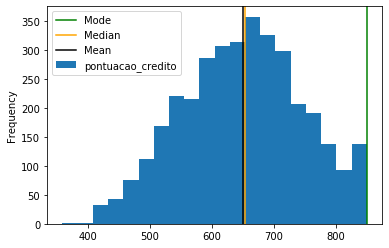

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

df[df['estado_residencia'] == 'SC']['pontuacao_credito'].plot.hist(bins=20)
plt.axvline(parsed_json['SC']['moda'], color = 'Green', label="Mode")
plt.axvline(parsed_json['SC']['mediana'], color = 'Orange', label="Median")
plt.axvline(parsed_json['SC']['media'], color = 'Black', label="Mean")
plt.legend()

**RS**


In [12]:
parsed_json['RS']['moda'] = int(df[df['estado_residencia'] == 'RS']['pontuacao_credito'].mode()[0])
parsed_json['RS']['mediana'] = int(df[df['estado_residencia'] == 'RS']['pontuacao_credito'].median())
parsed_json['RS']['media'] = df[df['estado_residencia'] == 'RS']['pontuacao_credito'].mean()
parsed_json['RS']['desvio_padrao'] = df[df['estado_residencia'] == 'RS']['pontuacao_credito'].std()

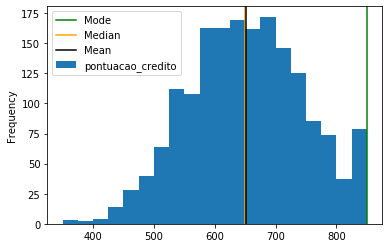

In [13]:
df[df['estado_residencia'] == 'RS']['pontuacao_credito'].plot.hist(bins=20)
plt.axvline(parsed_json['RS']['moda'], color = 'Green', label="Mode")
plt.axvline(parsed_json['RS']['mediana'], color = 'Orange', label="Median")
plt.axvline(parsed_json['RS']['media'], color = 'Black', label="Mean")
plt.legend()

**PR**


In [14]:
parsed_json['PR']['moda'] = int(df[df['estado_residencia'] == 'PR']['pontuacao_credito'].mode()[0])
parsed_json['PR']['mediana'] = int(df[df['estado_residencia'] == 'PR']['pontuacao_credito'].median())
parsed_json['PR']['media'] = df[df['estado_residencia'] == 'PR']['pontuacao_credito'].mean()
parsed_json['PR']['desvio_padrao'] = df[df['estado_residencia'] == 'PR']['pontuacao_credito'].std()

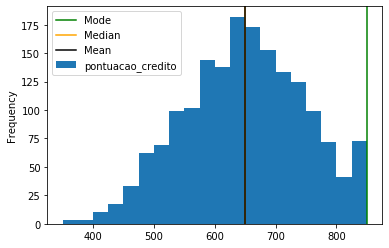

In [15]:
df[df['estado_residencia'] == 'PR']['pontuacao_credito'].plot.hist(bins=20)
plt.axvline(parsed_json['PR']['moda'], color = 'Green', label="Mode")
plt.axvline(parsed_json['PR']['mediana'], color = 'Orange', label="Median")
plt.axvline(parsed_json['PR']['media'], color = 'Black', label="Mean")
plt.legend()

**Como ficou o dict?**

In [16]:
parsed_json

{'SC': {'moda': 850,
  'mediana': 653,
  'media': 649.5376527422563,
  'desvio_padrao': 97.23349279343306},
 'RS': {'moda': 850,
  'mediana': 650,
  'media': 651.1051428571428,
  'desvio_padrao': 95.1365984138357},
 'PR': {'moda': 850,
  'mediana': 650,
  'media': 648.9612940496822,
  'desvio_padrao': 98.60718591309772}}

## Agora vamos descobrir qual estado tem a maior pontuação média

In [17]:
print(max(parsed_json, key=lambda v: parsed_json[v]['media']))


RS


## Salvando os valores no arquivo a ser submetido

In [18]:
with open('submission.json', 'w', encoding='utf8') as arq:
    json.dump(parsed_json, arq, ensure_ascii=False)  